<a href="https://colab.research.google.com/github/Yureeets/ml_labs/blob/main/lab2ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Інститут комп'ютерних наук та інформаційних технологій
Кафедра систем штучного інтелекту


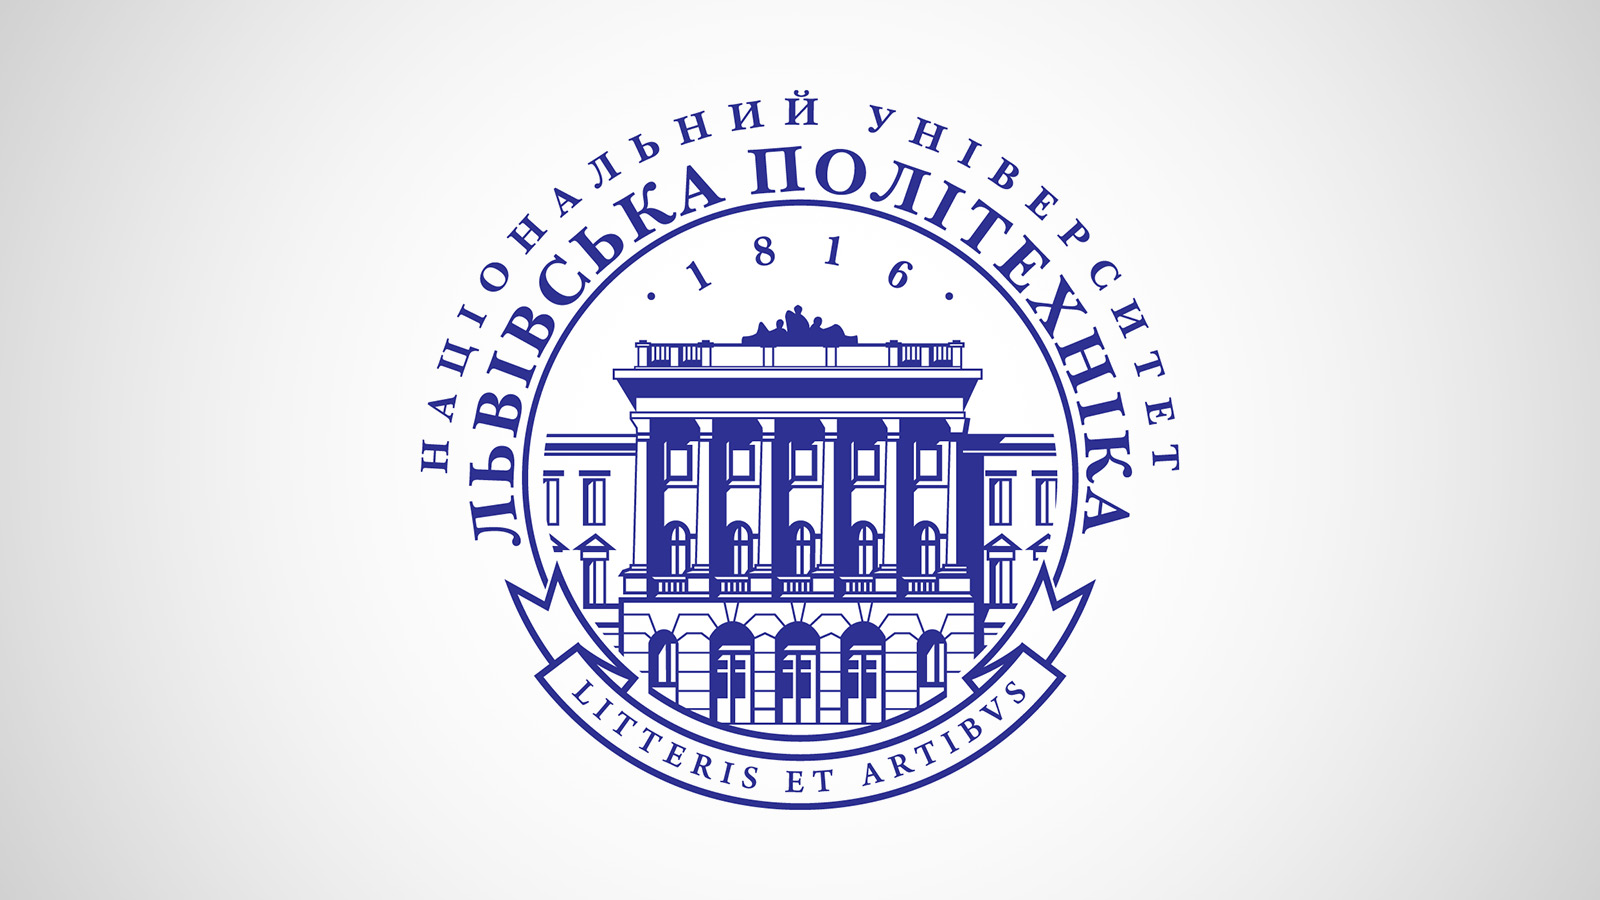
Звіт
Лабораторна робота №2
з курсу “Машинне Навчання”




Виконав:студент  групи  ШІ-23
Полуліх Юрій

Викладач:
Басистюк О.А.








Львів 2024

# **Лабораторна робота №2**
Тема: Дерева рішень. Метод головних компонент.

Мета: засвоїти основні відомості про роботу з алгоритмом метод головних компонент(PCA) та дерева рішень для класифікаційних завдань.

## **Завдання**
**Частина 1. Підготовка даних**

* Завантажити дані згідно варіанту.
* Розділити на тренувальну, валідаційну та тестові вибірки в пропорції 70/15/15
* Обробити NaN значення - або видаленням, або заповненням середнім, або якимось іншим чином. Обраний варіант обгрунтувати.
* Нормалізувати дані - для тренувальних даних обрахувати значення mean(середнього) та standard deviation(стандартного відхилення) для кожної з ознак і перетворити дані віднявши обраховане середнє та поділивши на стандартне відхилення. Зауважте, що на відміну від Z-score тут немає модуля. Нормалізувати валідаційні та тестові даних на основі обрахованих mean та std для тренувальних даних

**Частина 2. Побудова дерева рішень**

* Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.
* Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

**Частина 3. Зашумлення.**

* Добавити до тренувальних даних шум. Зробити це додаючи випадкове(uniform(рівномірний) розподіл в межах [-0.1,0.1]) зміщення до кожного елементу тренувальної вибірки датасету по кожній з ознак.
* Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.
* Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

**Частина 4. Знешумлення**

* Обрахувати на оригінальній тренувальній вибірці PCA. Візуалізувати отримані компоненти.
* Обрахувати на зашумленій тренувальній вибірці PCA. Візуалізувати отримані компоненти.
* Реконструювати дані використовуючи PCA обрахований на зашумлених даних для знешумлення. Для цього використати ознаки що пояснюють 95% variance.
* Візуалізувати оригінальні, зашумлені і знешумлені дані

**Частина 5**

* Побудувати на основі зашумлених і знешумлених даних тренувальної вибірки дерева рішень. Порівняти їхню точність на валідаційній та тренувальних вибірках.
* Візуалізувати отримані дерева рішень

## **Частина 1. Підготовка даних.**

Імпортуємо необхідні бібліотеки:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.decomposition import PCA

### 1.1. Завантажити дані згідно варіанту.

Оскільки я варіант №24 в загальному списку, то я обираю №7 в таблиці. Отже, це датасет **titanic**. Назва колонки яку потрібно передбачити: **survived**

Посилання на датасет:
https://www.kaggle.com/competitions/titanic/overview



In [ ]:
# Завантажуємо з диску
!wget "https://drive.google.com/uc?export=download&id=1WMYoDFUHuAlAYV08sLTIGUC1S9CtNxj0" -O filename.zip

--2024-09-20 15:49:19--  https://drive.google.com/uc?export=download&id=1WMYoDFUHuAlAYV08sLTIGUC1S9CtNxj0
Resolving drive.google.com (drive.google.com)... 64.233.187.102, 64.233.187.139, 64.233.187.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.187.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1WMYoDFUHuAlAYV08sLTIGUC1S9CtNxj0&export=download [following]
--2024-09-20 15:49:19--  https://drive.usercontent.google.com/download?id=1WMYoDFUHuAlAYV08sLTIGUC1S9CtNxj0&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34877 (34K) [application/octet-stream]
Saving to: ‘filename.zip’

filename.zip        100%[===================>]  34.06K  --.-KB/s    i

In [ ]:
!unzip -q /content/filename.zip

Імпортуємо та переглядаємо наш датасет:

In [ ]:
df = pd.read_csv('/content/train.csv',index_col = 'PassengerId')
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Переглянемо значення деяких колонок:

**pclass:** A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

**embarked:**	Port of Embarkation
* C = Cherbourg
* Q = Queenstown
* S = Southampton

**Fare:** Passenger fare

### 1.2. Обробити NaN значення - або видаленням, або заповненням середнім, або якимось іншим чином. Обраний варіант обгрунтувати.

Переглянемо розмір нашого датасету:

In [ ]:
df.shape

(891, 11)

Переглянемо деяку інформацію:

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Переглянемо кількість Null значень для кожної з колонок:

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


Бачимо, що такі колонки як **Age**, **Cabin** та **Embarked** мають частину відсутніх даних. Оскільки для колонки **Cabin** ця кількість є значною і загалом вона не несе значної користі ми видалимо її. Так само можна сказати і за колонки **Name** та **Ticket**, хоча в них і присутні всі дані. Отже тепер окремо дослідимо колонку **Age**, щоб вибрати відповідну стратегію.

In [ ]:
df.drop(['Cabin', 'Ticket','Name'], axis=1, inplace=True)

In [ ]:
df[df['Age'].isnull()].head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
6,0,3,male,NaN,0,0,8.4583,Q
18,1,2,male,NaN,0,0,13.0000,S
20,1,3,female,NaN,0,0,7.2250,C
27,0,3,male,NaN,0,0,7.2250,C
29,1,3,female,NaN,0,0,7.8792,Q
30,0,3,male,NaN,0,0,7.8958,S
32,1,1,female,NaN,1,0,146.5208,C


Отже є декілька рішень, щоб позбутися **NaN** значень в колоні **Age**, а саме провести інтерполяцію по кожному з стовпців, замінити всі значення на медіані, видалити записи із значеннями **NaN** в стовпцях в них. Інтерполяцію в даному випадку застосувати не вийде, оскільки значна кількість даних є пропущено, і відповідно отримані інтерполяцією результати можуть сильно вплинути на навчання моделі, аналогічно і з середніми значеннями, саме тому аби уникнути можливих подальшому помилок навчання моделі на неправильних даних (якими можуть бути середні значення або інші числа отримані інтерполяцією)

In [ ]:
df = df.dropna(subset=['Age'])

Тепер розглянемо колонку **Embarked**, де у нас є 2 пропущені рядки:

In [ ]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN


Для заповнення використаємо ту категорію, що найчастіше зустрічається. Перед тим переглянемо, які саме значення зустрічаються найчастіше:

In [ ]:
df.Embarked.value_counts()

,count
Embarked,
S,554
C,130
Q,28


Заповнюємо та одразу перевіримо коректність:

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)
df[df.index.isin([46, 662])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
662,0,3,male,40.0,0,0,7.225,C


Перезагружаємо Індексацію

In [ ]:
df.reset_index(drop = True,inplace = True)

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Крім цього перетворимо значення колонок **Sex** та **Embarked** використовуючи **Label Encoding**:

In [ ]:
sex_encoder = LabelEncoder()
df['Sex'] = sex_encoder.fit_transform(df['Sex'])

embarked_encoder = LabelEncoder()
df['Embarked'] = embarked_encoder.fit_transform(df['Embarked'])

Отже, як бачимо ми позбулися **NaN** значень та застосували **LabelEncoding** дял відповідних стовпців. Тому готові працювати з нашим датасетом далі.

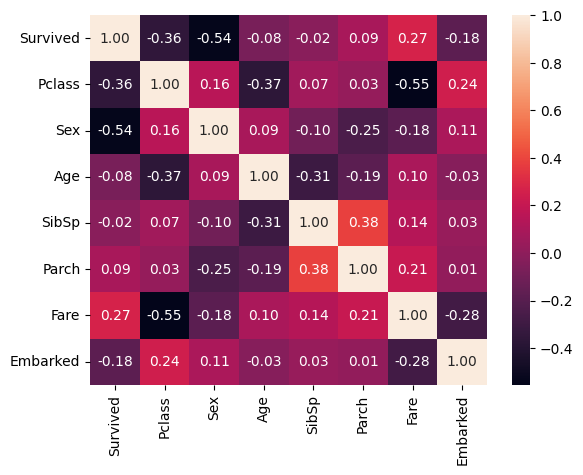

In [ ]:
sns.heatmap(df.corr(), annot=True,fmt = '.2f')
plt.show()

### 1.3. Розділити на тренувальну, валідаційну та тестові вибірки в пропорції 70/15/15

Перед тим як розділити наші дані, визначимо, яка колонка в нас буде прогнозуватися (Y). В нашому випадку це **Survived**.

In [ ]:
y = df['Survived']
X = df.drop(['Survived'], axis = 1)

Тепер ми готові розділити наші дані на тренувальну, валідаційну та тестову вибірки:

In [ ]:
X_train, X_template, y_train, y_template = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_template, y_template, test_size=0.5, shuffle=False, random_state = 42)

Переглянемо розміри наших нових вибірок:

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((499, 7), (107, 7), (108, 7))

### 1.4. Нормалізувати дані - для тренувальних даних обрахувати значення mean(середнього) та standard deviation(стандартного відхилення) для кожної з ознак і перетворити дані віднявши обраховане середнє та поділивши на стандартне відхилення. Зауважте, що на відміну від Z-score тут немає модуля. Нормалізувати валідаційні та тестові даних на основі обрахованих mean та std для тренувальних даних

Так як в нашому датасеті наявні категорійні дані отримані через **LabelEncoding**, то варто застосовувати нормалізацію лише до ознак, які будуть безпосередньо використовуватися при навчанні моделі, для цього аби не рахувати нормалізовані дані вручну, застосуємо вже реалізовану функцію StandartScaler() та відповідно на основі значень mean, std для навчальних даних нормалізуємо валідаційні та тестові.

Отже нормалізацію застосуємо лише для стовпців **Fare** та **Age**, оскільки так як решта є категорійною або не має значної кількості значень, то ми обираємо лише ці.

In [ ]:
scaler = StandardScaler()
X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])
X_test[['Age','Fare']] = scaler.transform(X_test[['Age','Fare']])
X_val[['Age','Fare']] = scaler.transform(X_val[['Age','Fare']])

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.544668,1,0,-0.561533,2
1,1,0,0.553193,1,0,0.778468,0
2,3,0,-0.270202,0,0,-0.547407,2
3,1,0,0.347344,1,0,0.397953,2
4,3,1,0.347344,0,0,-0.544791,2


In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
606,1,0,0.210112,0,0,1.096903,2
607,3,1,0.759042,0,0,-0.564149,2
608,3,1,-0.681900,0,0,-0.561968,0
609,1,0,0.415960,1,2,1.797945,2
610,3,1,-0.956365,0,0,-0.550546,2


Тепер наші дані готові для навчання нашої моделі **Дерева Рішень**.

## **Частина 2. Побудова дерева рішень.**

### 2.1. Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.

In [ ]:
depths = [1, 2, 5]
decision_trees = []
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=32)
    model.fit(X_train, y_train)
    decision_trees.append(model)

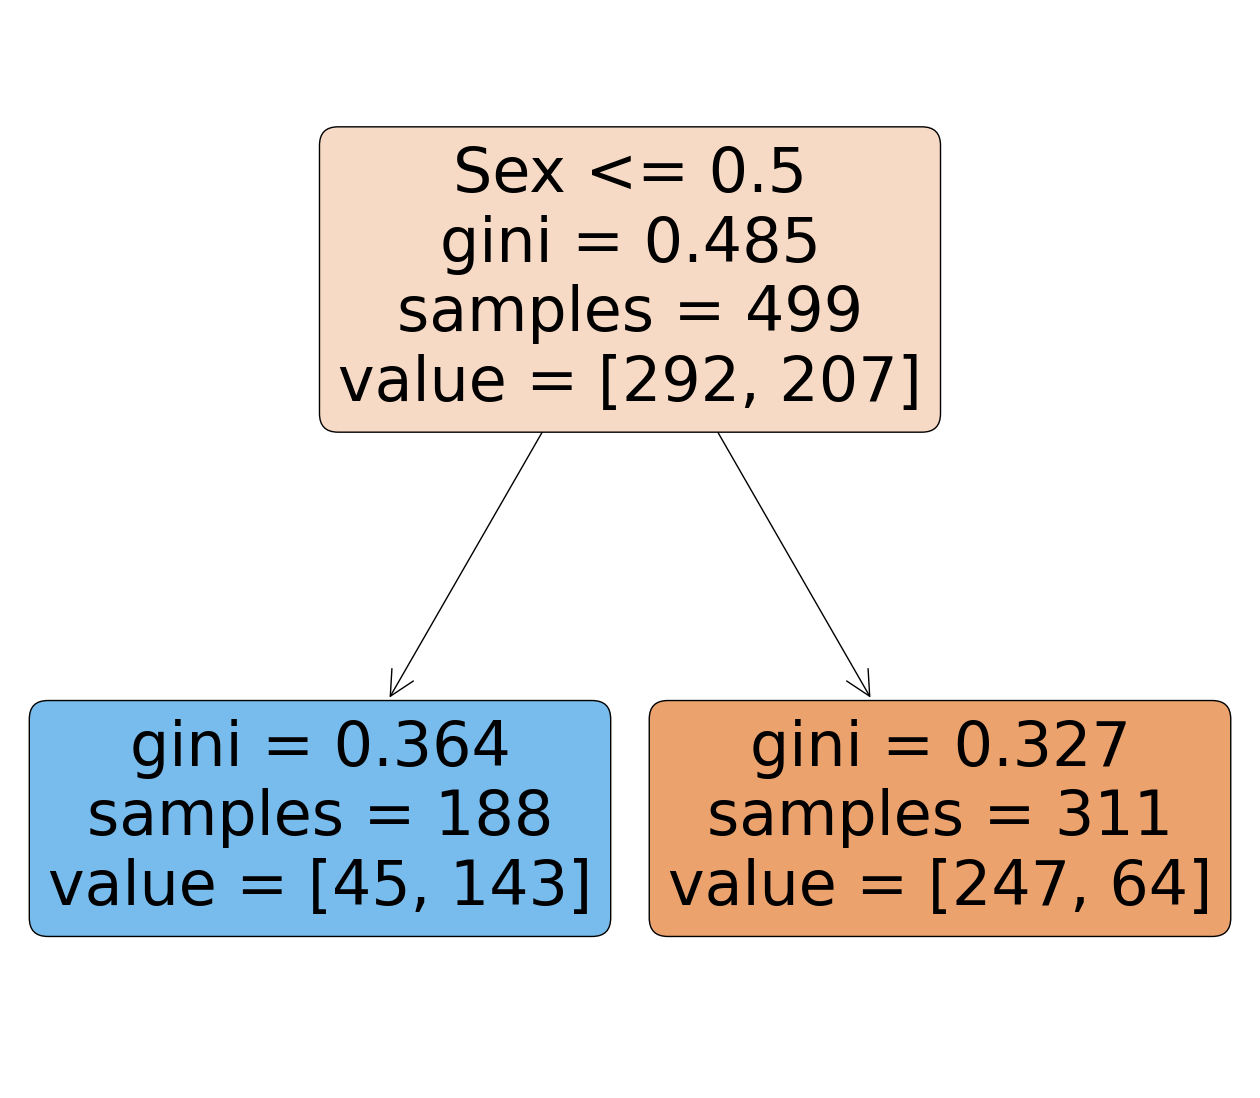

 Depth of decision tree => 1

 MSE on train data => 0.2184
 MAE on train data => 0.2184
 Accuracy on train data => 1.0000

 MSE on validation data => 0.2430
 MAE on validation data => 0.2430
 Accuracy on validation data => 0.7570

 MSE on test data => 0.2037
 MAE on test data => 0.2037
 Accuracy on test data => 0.7963



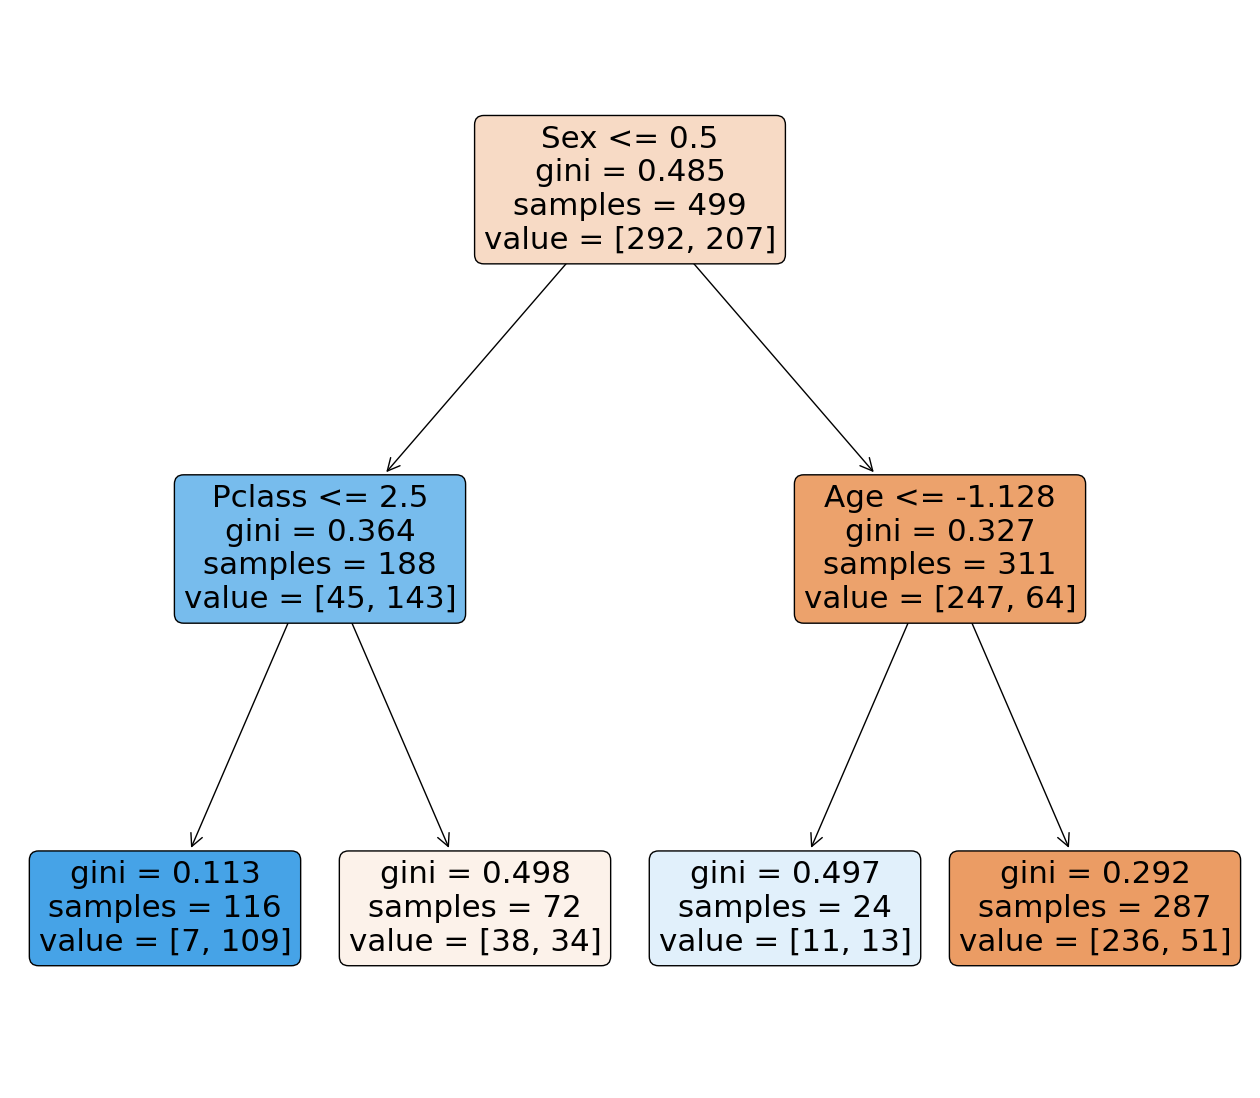

 Depth of decision tree => 2

 MSE on train data => 0.2064
 MAE on train data => 0.2064
 Accuracy on train data => 1.0000

 MSE on validation data => 0.1869
 MAE on validation data => 0.1869
 Accuracy on validation data => 0.8131

 MSE on test data => 0.1944
 MAE on test data => 0.1944
 Accuracy on test data => 0.8056



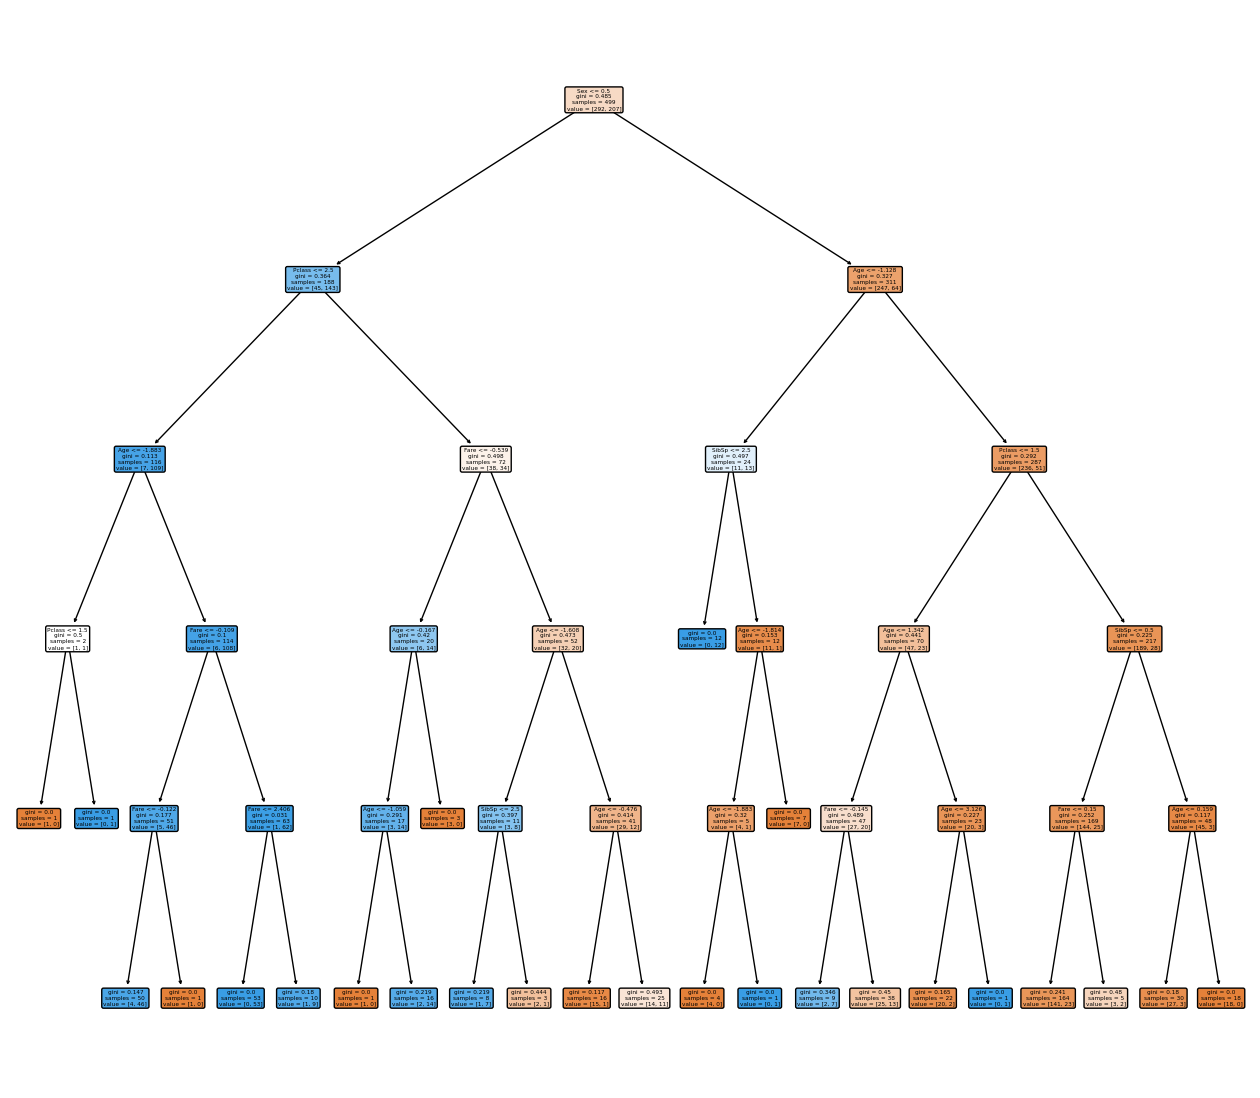

 Depth of decision tree => 5

 MSE on train data => 0.1323
 MAE on train data => 0.1323
 Accuracy on train data => 1.0000

 MSE on validation data => 0.1682
 MAE on validation data => 0.1682
 Accuracy on validation data => 0.8318

 MSE on test data => 0.1759
 MAE on test data => 0.1759
 Accuracy on test data => 0.8241



In [ ]:
for tree in decision_trees:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(X.columns), filled=True, rounded=True)
    plt.show()
    y_pred_train = tree.predict(X_train)
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)
    threshold = 0.1

    y_pred_train_bin = (y_pred_train <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)


    print(f" Depth of decision tree => {tree.max_depth}\n\n",

          f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
          f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
          f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

          f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
          f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
          f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",


          f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n",
          f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
          f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n")

Отже як бачимо дерево з **глибиною 5** має найкращі результати та досягає точності близько **0.82** на тестовій вибірці. В той час як дерево з глибоною 2 досягає 0.80, а з глибиною 1 - **0.79** на тестових вибірках.

## **Частина 3. Зашумлення.**



### 3.1. Добавити до тренувальних даних шум. Зробити це додаючи випадкове(uniform(рівномірний) розподіл в межах [-0.1,0.1]) зміщення до кожного елементу тренувальної вибірки датасету по кожній з ознак.

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.544668,1,0,-0.561533,2
1,1,0,0.553193,1,0,0.778468,0
2,3,0,-0.270202,0,0,-0.547407,2
3,1,0,0.347344,1,0,0.397953,2
4,3,1,0.347344,0,0,-0.544791,2


Ініціалізуємо та додаємо шум:

In [ ]:
# X_noise = np.random.uniform(low=-0.1, high=0.1, size= X_train.shape[0])
# X_train_noise = X_train + X_noise
# X_train_noise.head()

In [ ]:
X_noise = np.random.uniform(low=-0.1, high=0.1, size= X_train.shape[0])
X_train_noise = X_train.copy()

X_train_noise['Age'] =  X_train_noise['Age'] + X_noise
X_noise = np.random.uniform(low=-0.1, high=0.1, size= (X_train.shape[0]))
X_train_noise['Fare'] =  X_train_noise['Fare'] + X_noise
X_train_noise.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.544130,1,0,-0.577615,2
1,1,0,0.554005,1,0,0.693836,0
2,3,0,-0.362984,0,0,-0.477249,2
3,1,0,0.309395,1,0,0.366132,2
4,3,1,0.313139,0,0,-0.634503,2


### 3.2. Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.

In [ ]:
depths = [1, 2, 5]
noise_decision_trees = []
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=32)
    model.fit(X_train_noise, y_train)
    noise_decision_trees.append(model)

### 3.3. Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

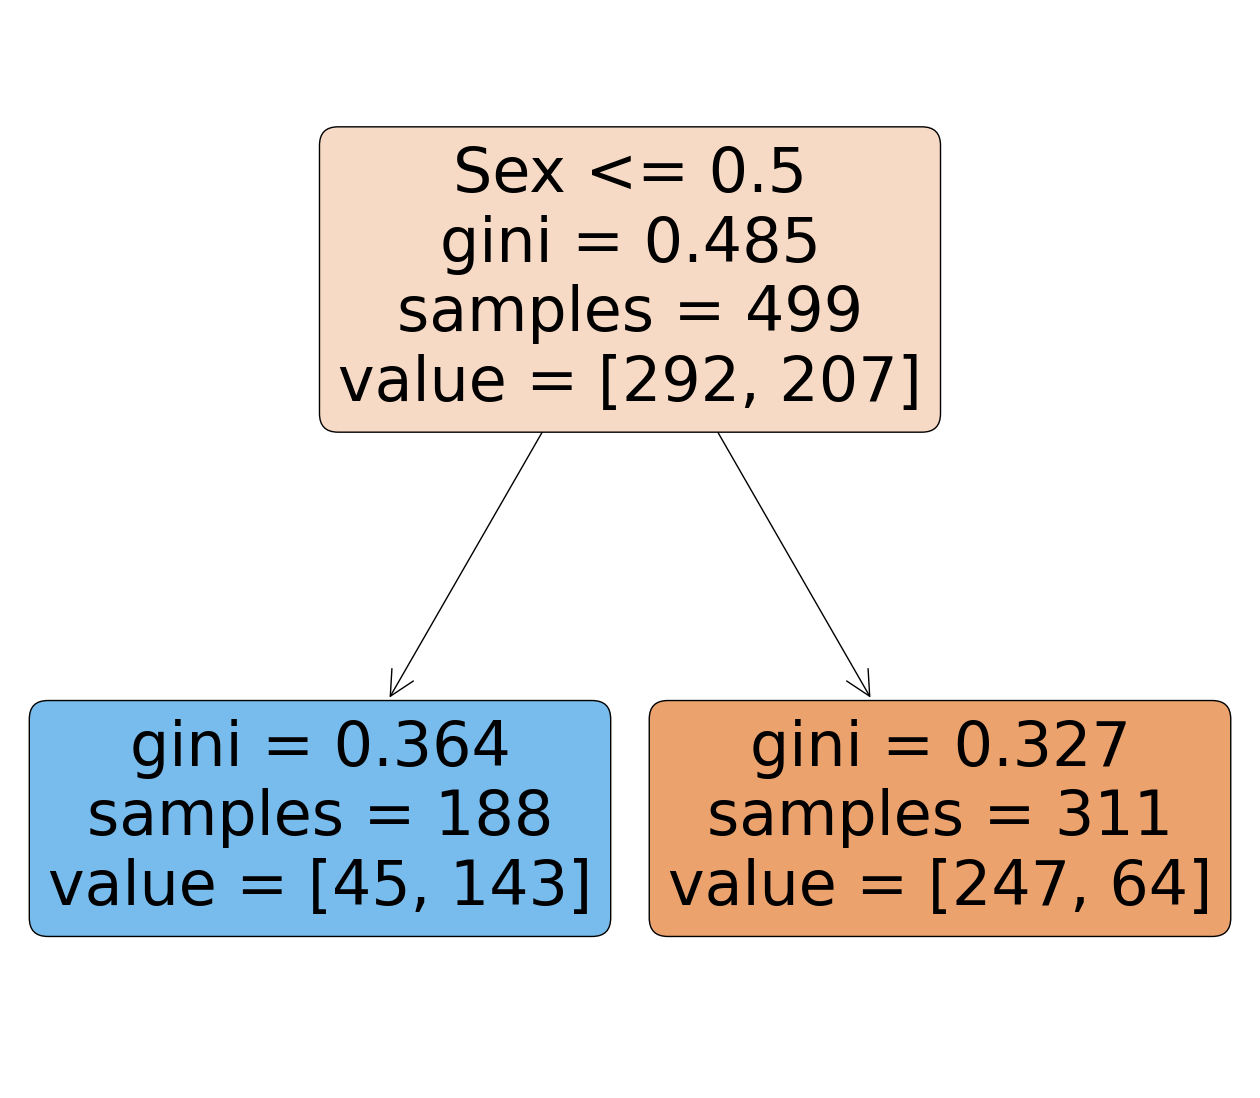

 Depth of decision tree => 1

 MSE on train data => 0.2184
 MAE on train data => 0.2184
 Accuracy on train data => 1.0000

 MSE on validation data => 0.2430
 MAE on validation data => 0.2430
 Accuracy on validation data => 0.7570

 MSE on test data => 0.2037
 MAE on test data => 0.2037
 Accuracy on test data => 0.7963



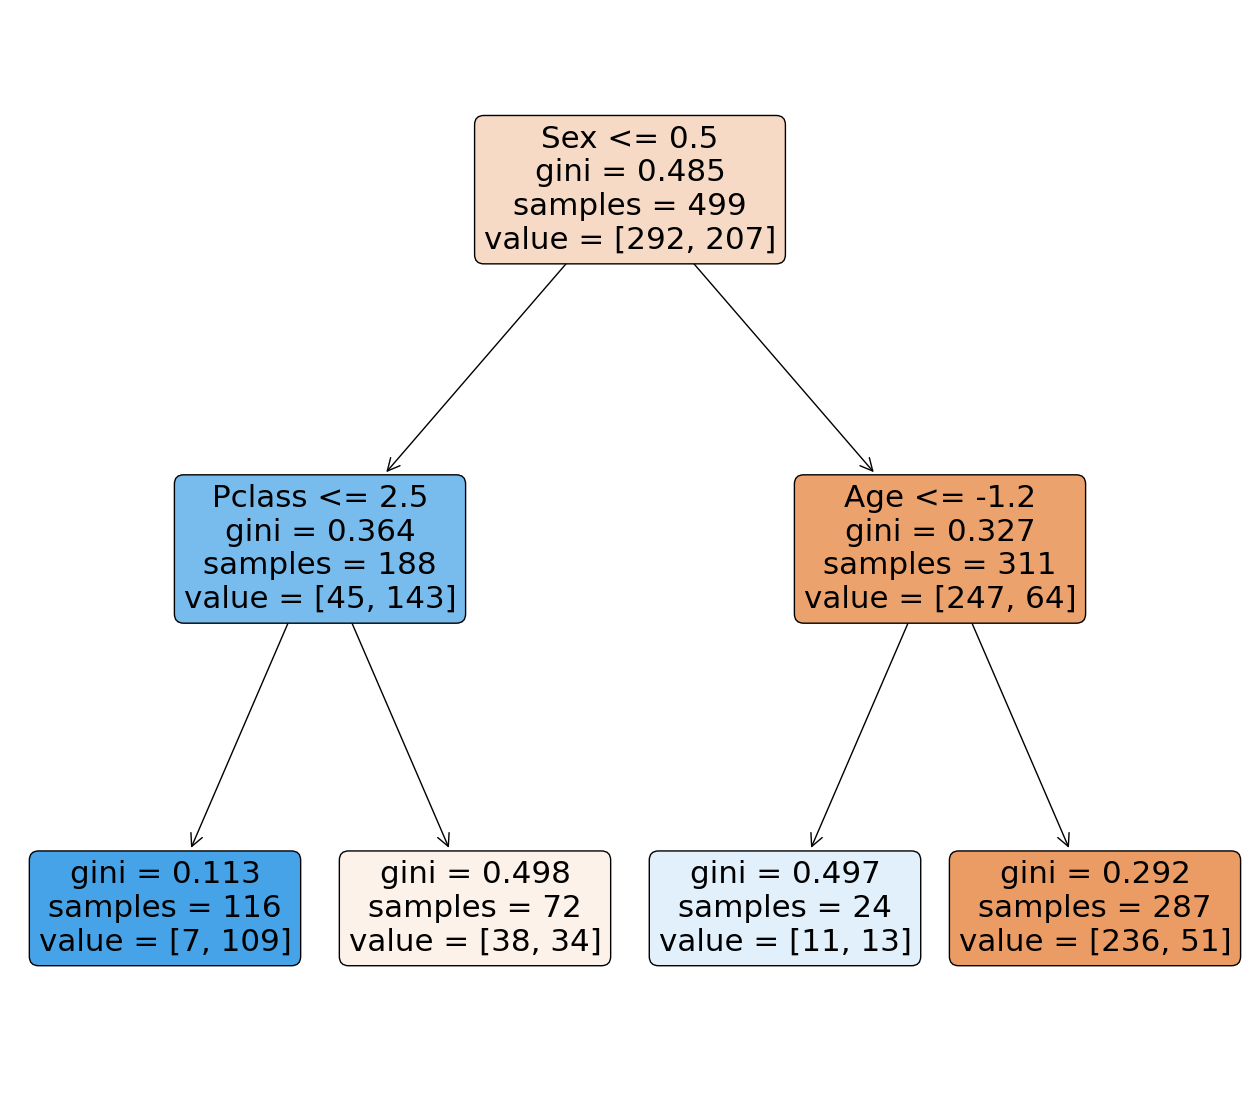

 Depth of decision tree => 2

 MSE on train data => 0.2064
 MAE on train data => 0.2064
 Accuracy on train data => 1.0000

 MSE on validation data => 0.1869
 MAE on validation data => 0.1869
 Accuracy on validation data => 0.8131

 MSE on test data => 0.1944
 MAE on test data => 0.1944
 Accuracy on test data => 0.8056



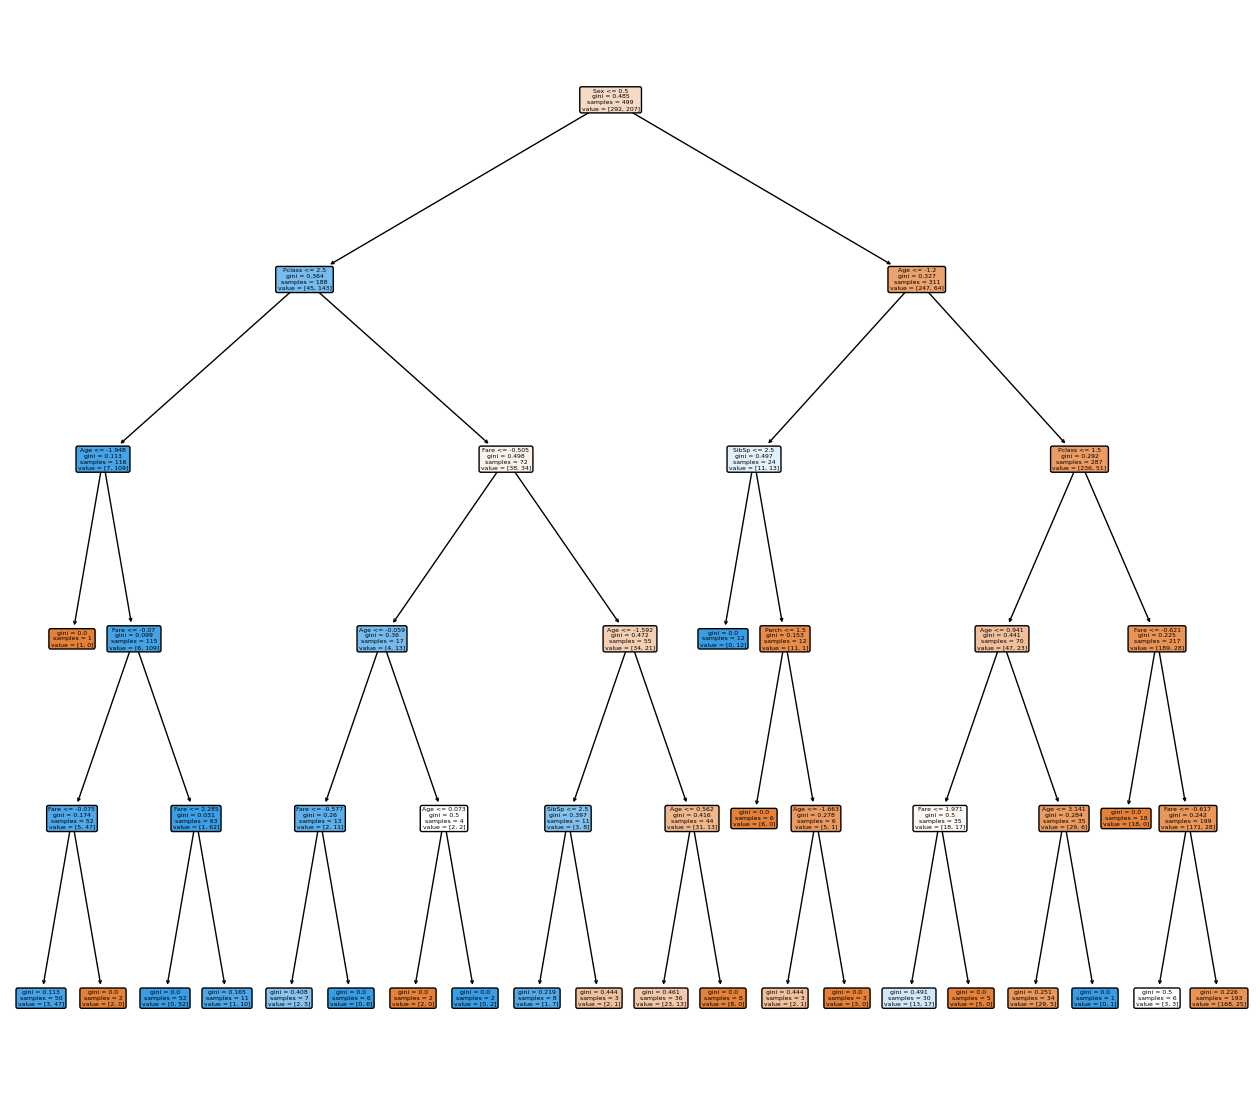

 Depth of decision tree => 5

 MSE on train data => 0.1623
 MAE on train data => 0.1623
 Accuracy on train data => 1.0000

 MSE on validation data => 0.1402
 MAE on validation data => 0.1402
 Accuracy on validation data => 0.8598

 MSE on test data => 0.1574
 MAE on test data => 0.1574
 Accuracy on test data => 0.8426



In [ ]:
for tree in noise_decision_trees:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(X.columns), filled=True, rounded=True)
    plt.show()
    y_pred_train = tree.predict(X_train)
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)
    threshold = 0.1

    y_pred_train_bin = (y_pred_train <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)


    print(f" Depth of decision tree => {tree.max_depth}\n\n",

          f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
          f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
          f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

          f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
          f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
          f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",


          f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n",
          f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
          f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n")

Загалом бачимо, що **зашумлення** суттєво не вплинуло на точності. Варто відмітити, що для дерева з **глибиною 5** точність на **валідаційному** наборі трохи покрашилася на **1%**, на **тестовому** не змінилася. Теж саме можна сказати про дерево **глибиною 2**. А от для дерева **глибиною 1** точність не змінилася

## Частина 4. Знешумлення



### 4.1. Обрахувати на оригінальній тренувальній вибірці PCA. Візуалізувати отримані компоненти.

Для тренувальних даних, та зашумлених даних порахуємо алгоритм **PCA**, та візуалізуємо отримані результати.

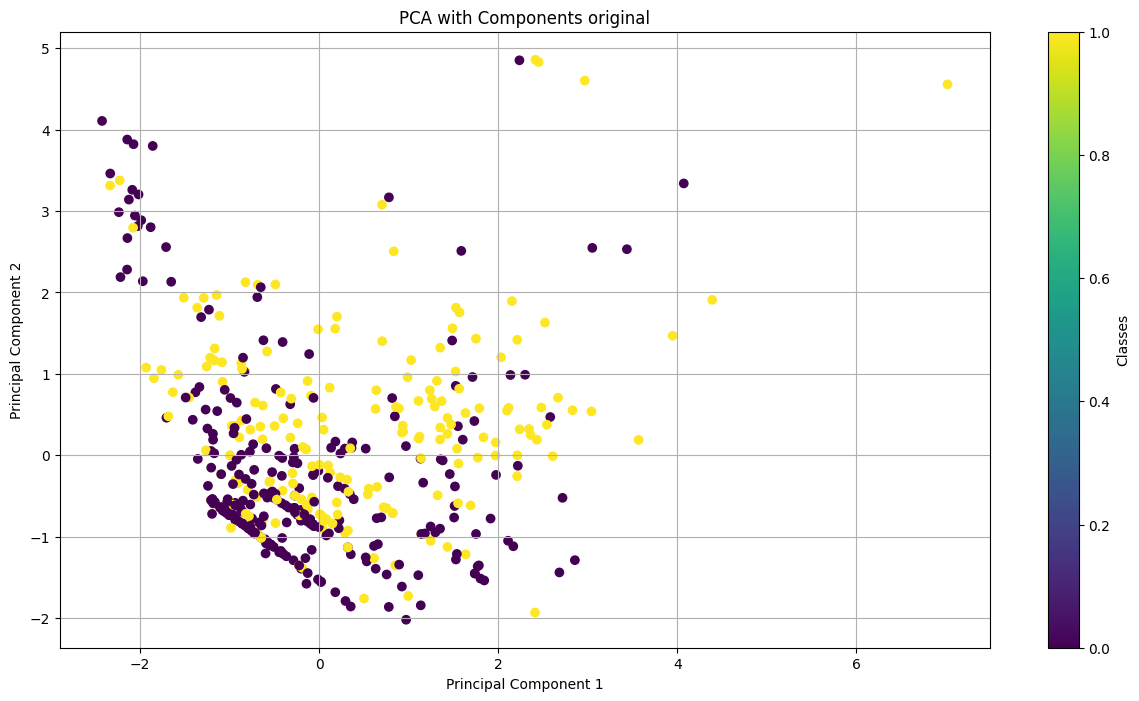

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(15, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')

plt.title('PCA with Components original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Classes')

plt.grid(True)
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.31171611, 0.29073913])

Із отриманих результатів можемо сказати, що більшу частку дисперсії пояснює компонента з variance **0.31** і вдіповідно другий компонент пояснює **0.29** даних.

Тепер спробуємо повернути початкові тренувальні дані, за рахунок знешумлення зашумлених даних, також використовуючи алгоритм PCA для **95%** дисперсії. Та відобразимо на графіку

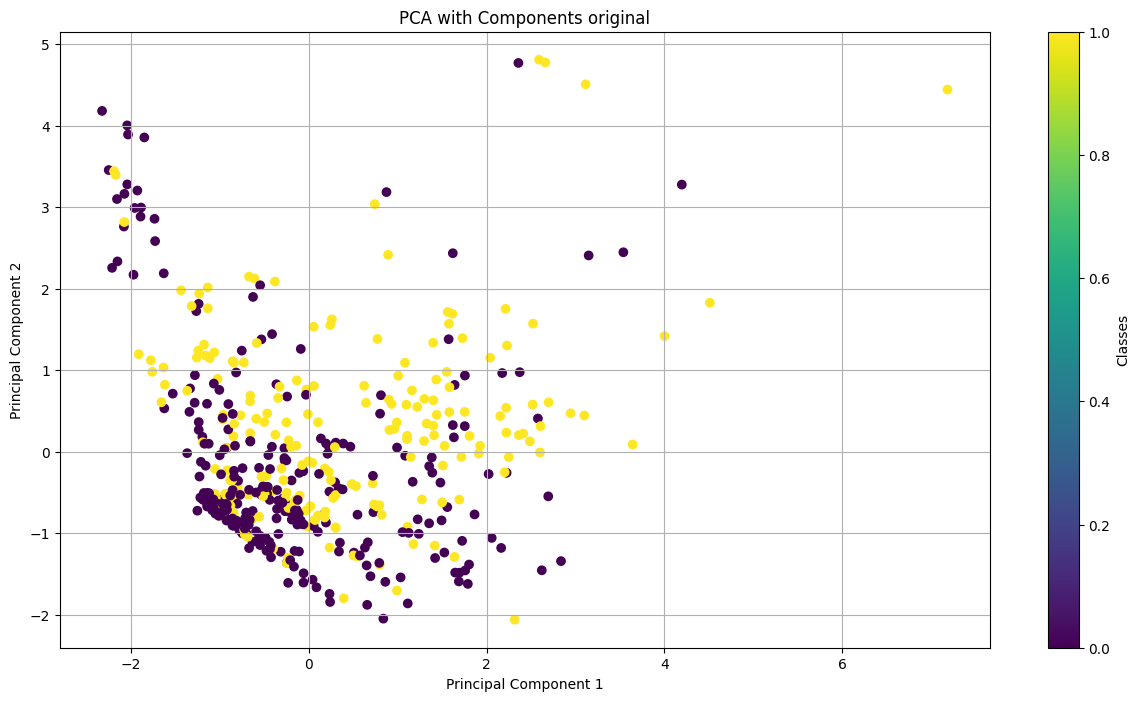

In [ ]:
pca_95 = PCA(0.95)
X_train_95 = pca_95.fit_transform(X_train_noise)
X_train_denoised = pca_95.inverse_transform(X_train_95)

plt.figure(figsize=(15, 8))
scatter = plt.scatter(X_train_95[:, 0], X_train_95[:, 1], c=y_train, cmap='viridis')

plt.title('PCA with Components original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Classes')

plt.grid(True)
plt.show()

Для зручності створимо для кожного свій датафрейм та переглянемо як дані змінювалися на кожному з етапів.

In [ ]:
df_original_data = pd.DataFrame(X_train, columns=X_train.columns)
df_noise_data =  pd.DataFrame(X_train_noise, columns=X_train.columns)
df_denoised_data = pd.DataFrame(X_train_denoised, columns=X_train.columns)

In [ ]:
df_original_data.iloc[[0]]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.544668,1,0,-0.561533,2


In [ ]:
df_noise_data.iloc[[0]]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.54413,1,0,-0.577615,2


In [ ]:
df_denoised_data.iloc[[0]]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.043087,0.838118,-0.521885,1.004318,-0.028678,-0.565285,2.006697


Відобразимо на графіку:

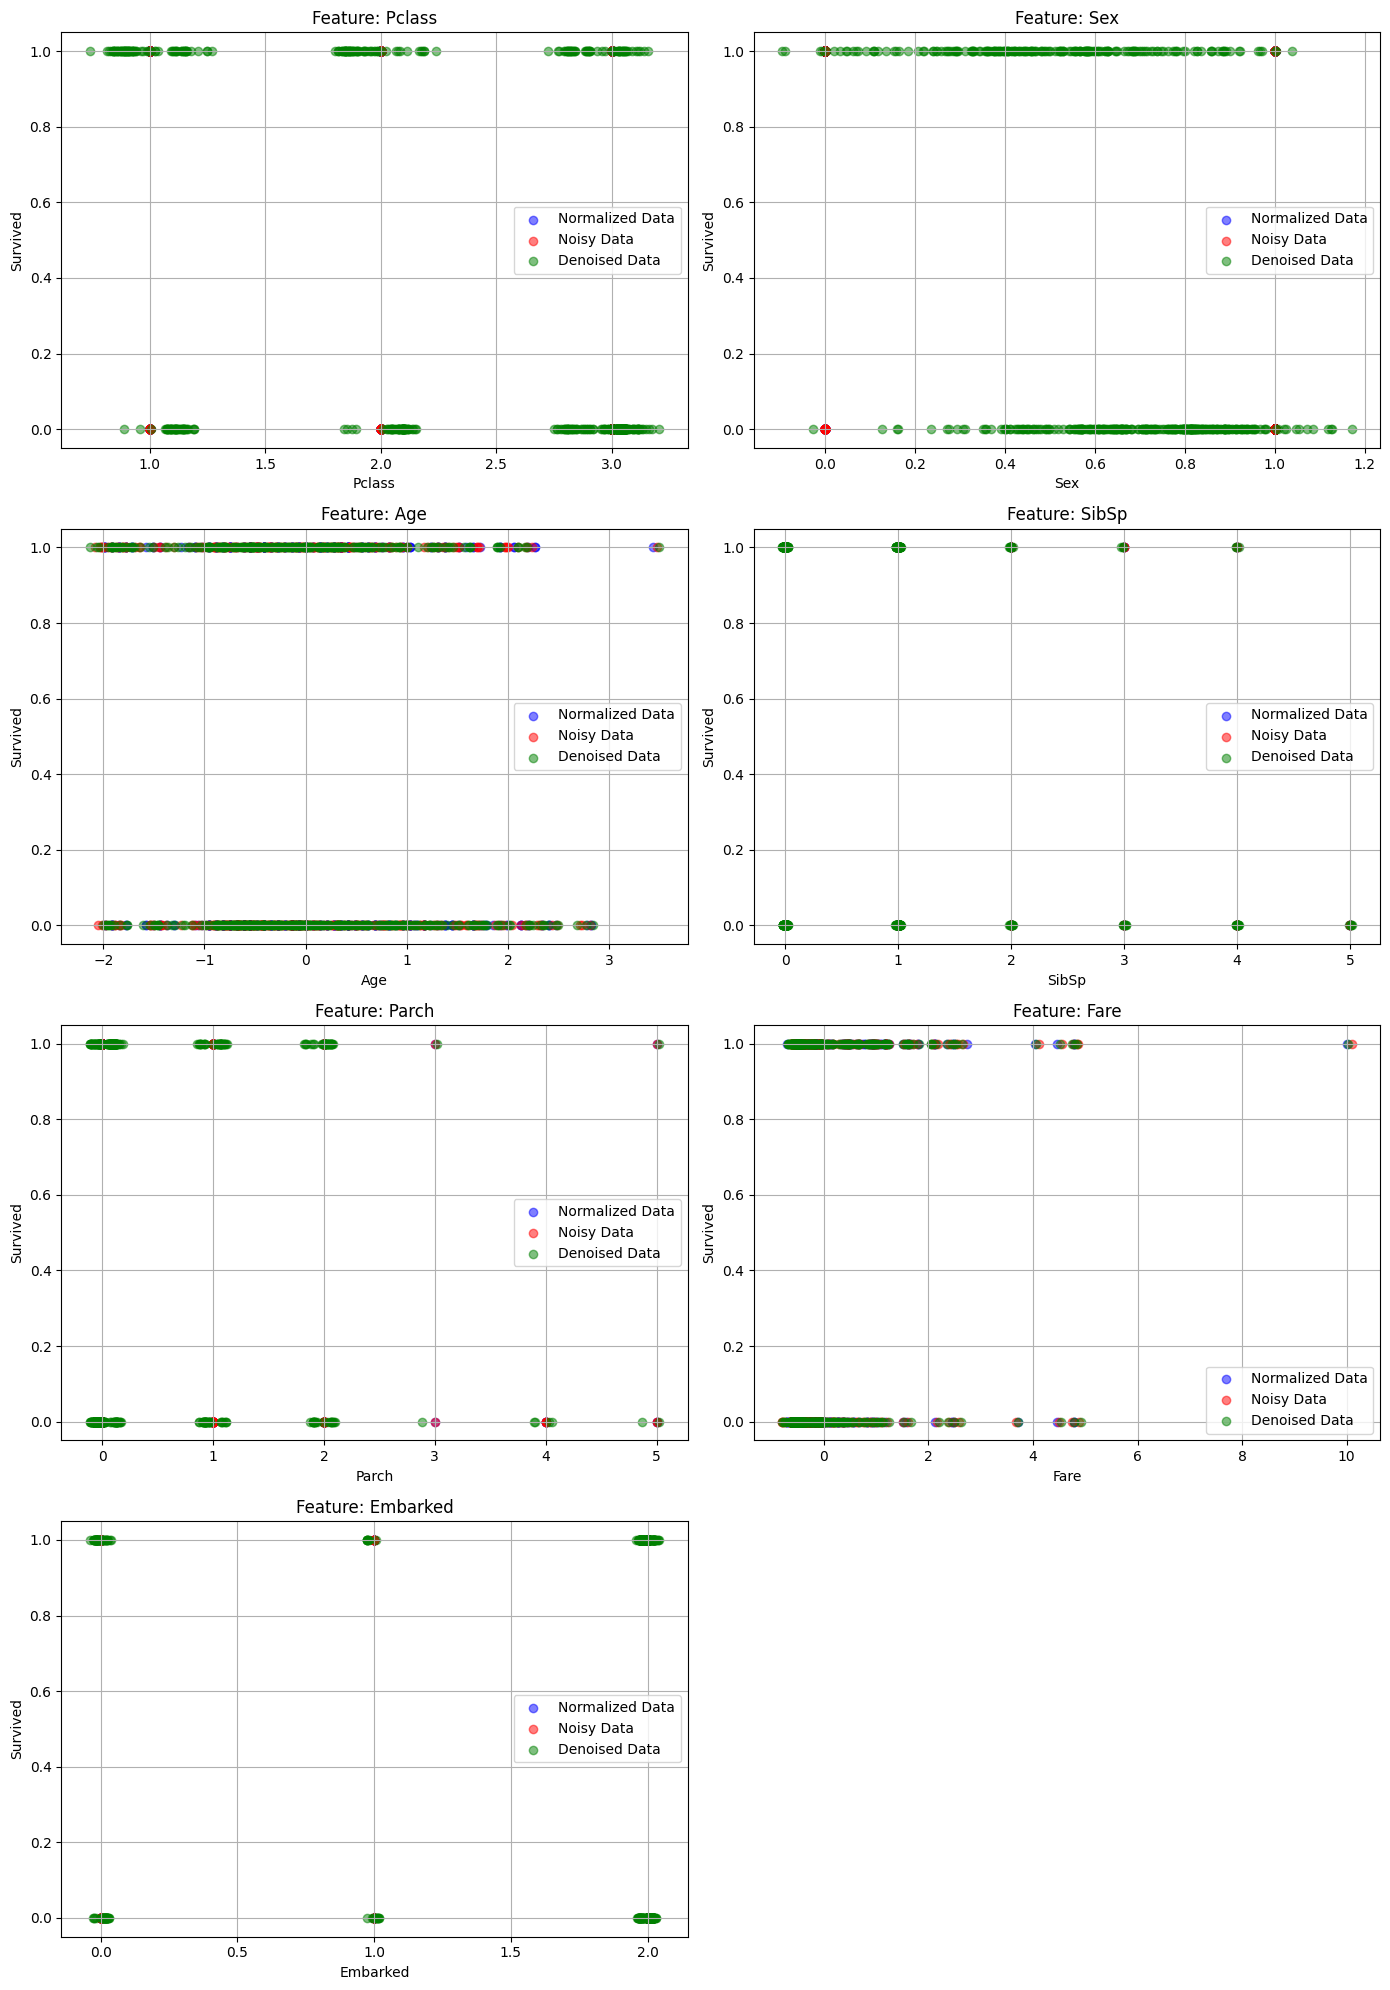

In [ ]:
feature_names = list(X_train.columns)
n_cols = 2
n_rows = (len(feature_names) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 5 * n_rows))

for j in range(len(feature_names)):
    ax = axes[j // n_cols, j % n_cols]
    ax.scatter(X_train.iloc[:, j], y_train, c='blue', label='Normalized Data', alpha=0.5)
    ax.scatter(X_train_noise.iloc[:, j], y_train, c='red', label='Noisy Data', alpha=0.5)
    ax.scatter(df_denoised_data.iloc[:, j], y_train, c='green', label='Denoised Data', alpha=0.5)

    ax.set_xlabel(f'{feature_names[j]}')
    ax.set_ylabel('Survived')
    ax.legend()
    ax.grid(True)
    ax.set_title(f'Feature: {feature_names[j]}')

for j in range(len(feature_names), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

## **Частина 5**



### 5.1 Побудувати на основі зашумлених і знешумлених даних тренувальної вибірки дерева рішень. Порівняти їхню точність на валідаційній та тренувальних вибірках.Візуалізувати отримані дерева рішень

Отже, для початку побудуємо дерево рішень для зашумшених даних

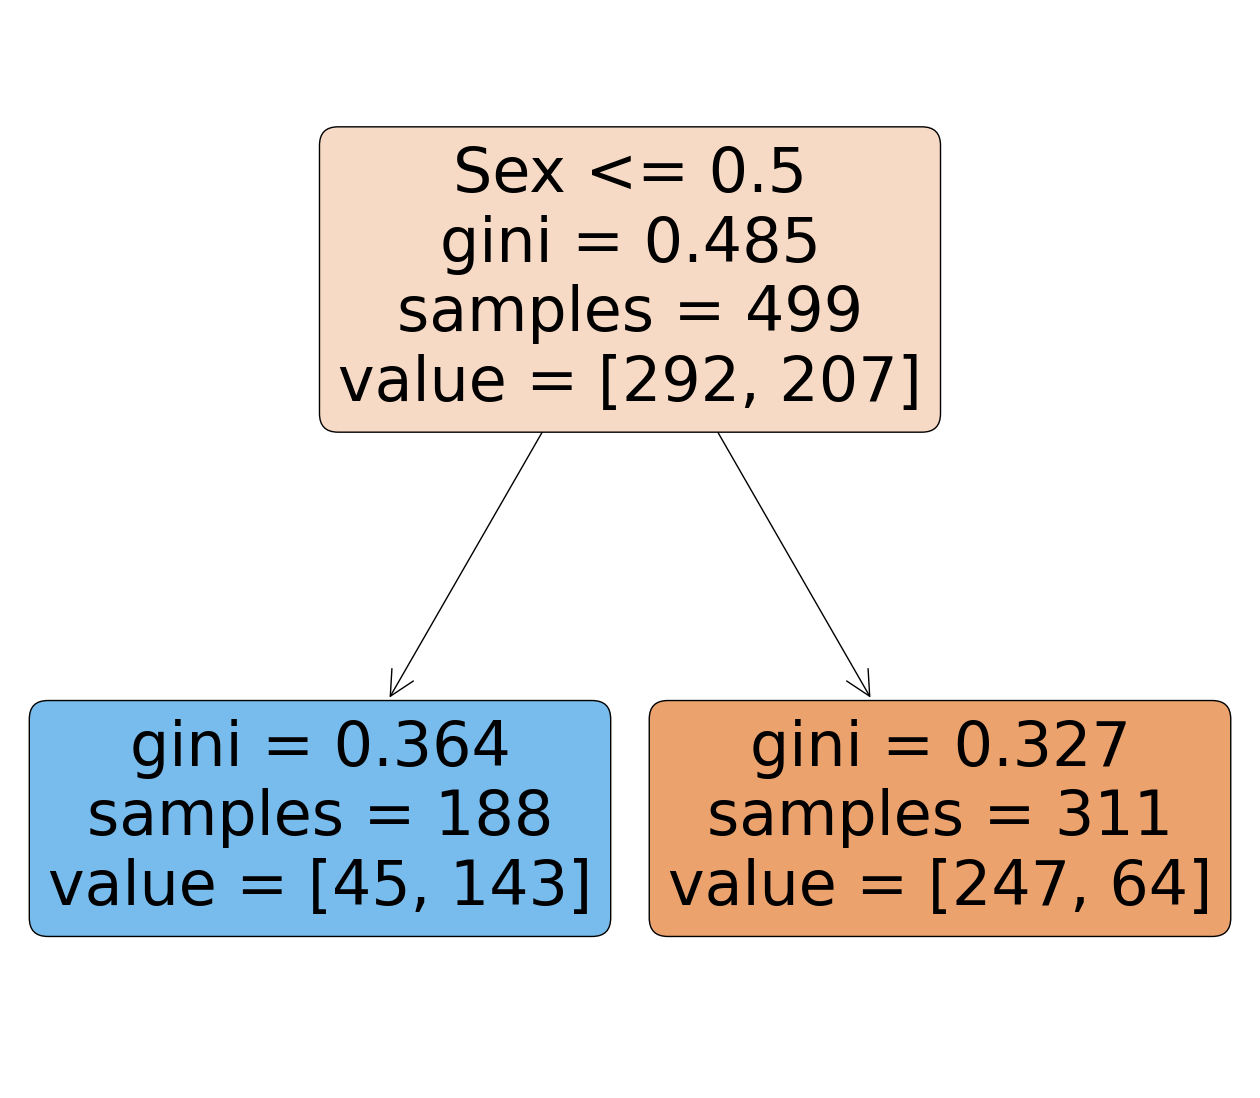

 Depth of decision tree => 1

 MSE on train data => 0.1623
 MAE on train data => 0.1623
 Accuracy on train data => 1.0000

 MSE on validation data => 0.2430
 MAE on validation data => 0.2430
 Accuracy on validation data => 0.7570

 MSE on test data => 0.2037
 MAE on test data => 0.2037
 Accuracy on test data => 0.7963



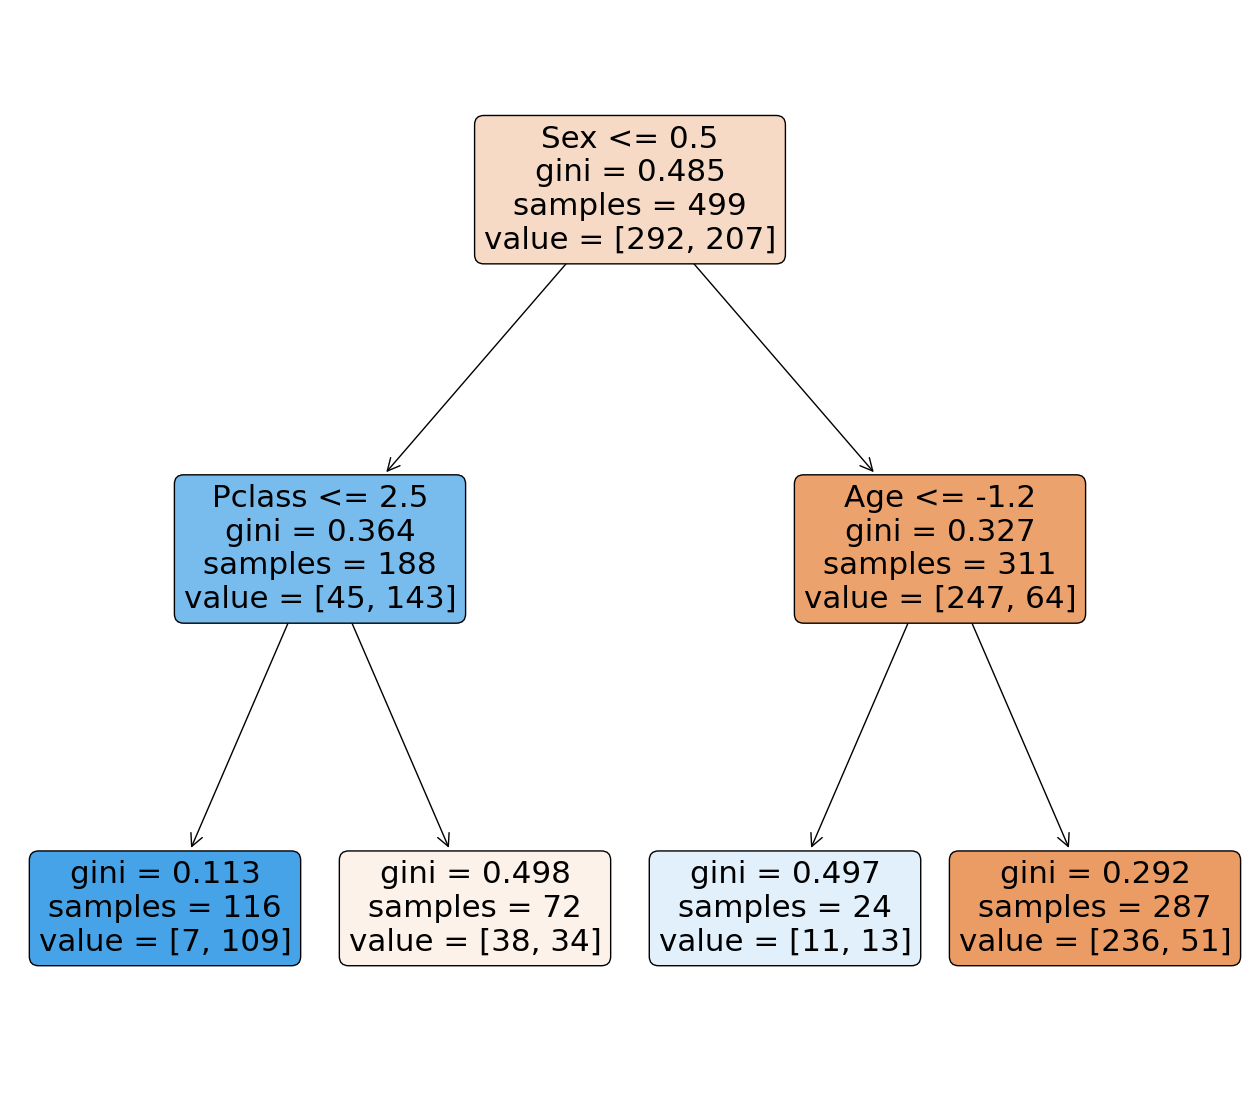

 Depth of decision tree => 2

 MSE on train data => 0.1623
 MAE on train data => 0.1623
 Accuracy on train data => 1.0000

 MSE on validation data => 0.1869
 MAE on validation data => 0.1869
 Accuracy on validation data => 0.8131

 MSE on test data => 0.1944
 MAE on test data => 0.1944
 Accuracy on test data => 0.8056



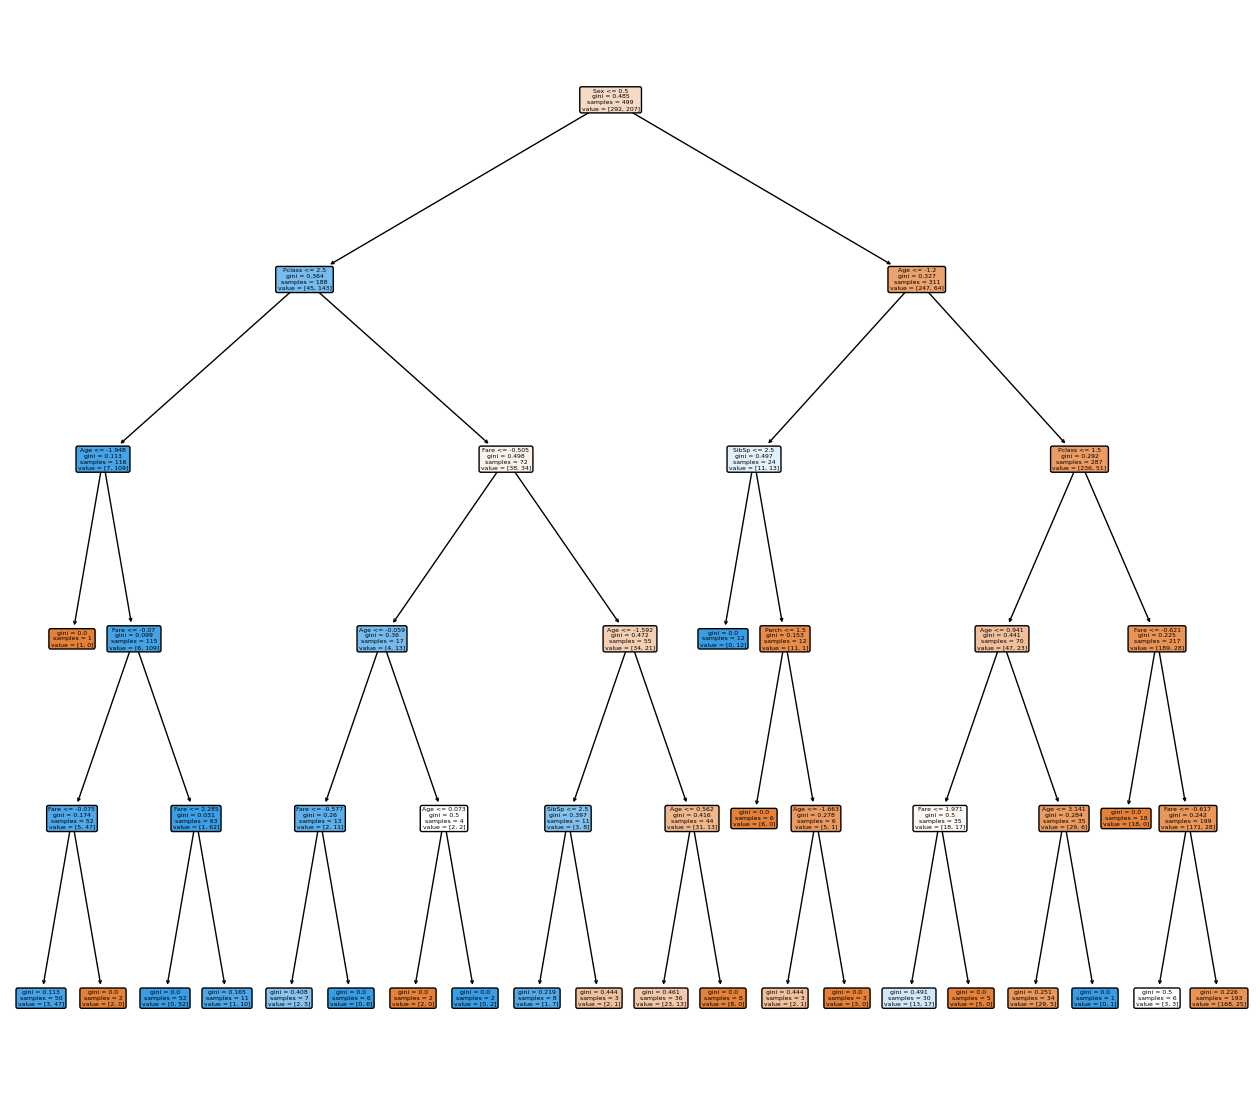

 Depth of decision tree => 5

 MSE on train data => 0.1623
 MAE on train data => 0.1623
 Accuracy on train data => 1.0000

 MSE on validation data => 0.1402
 MAE on validation data => 0.1402
 Accuracy on validation data => 0.8598

 MSE on test data => 0.1574
 MAE on test data => 0.1574
 Accuracy on test data => 0.8426



In [ ]:
noise_trees_second = []
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=32)
    model.fit(X_train_noise, y_train)
    noise_trees_second.append(model)

for tree in noise_trees_second:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(X.columns), filled=True, rounded=True)
    plt.show()
    y_pred_train_noise = tree.predict(X_train_noise)
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)

    threshold = 0.1

    y_pred_train_bin = (y_pred_train_noise <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)

    print(f" Depth of decision tree => {tree.max_depth}\n\n",

          f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
          f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
          f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

          f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
          f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
          f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",


          f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n",
          f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
          f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n")

Побудуємо для знешумлених даних:

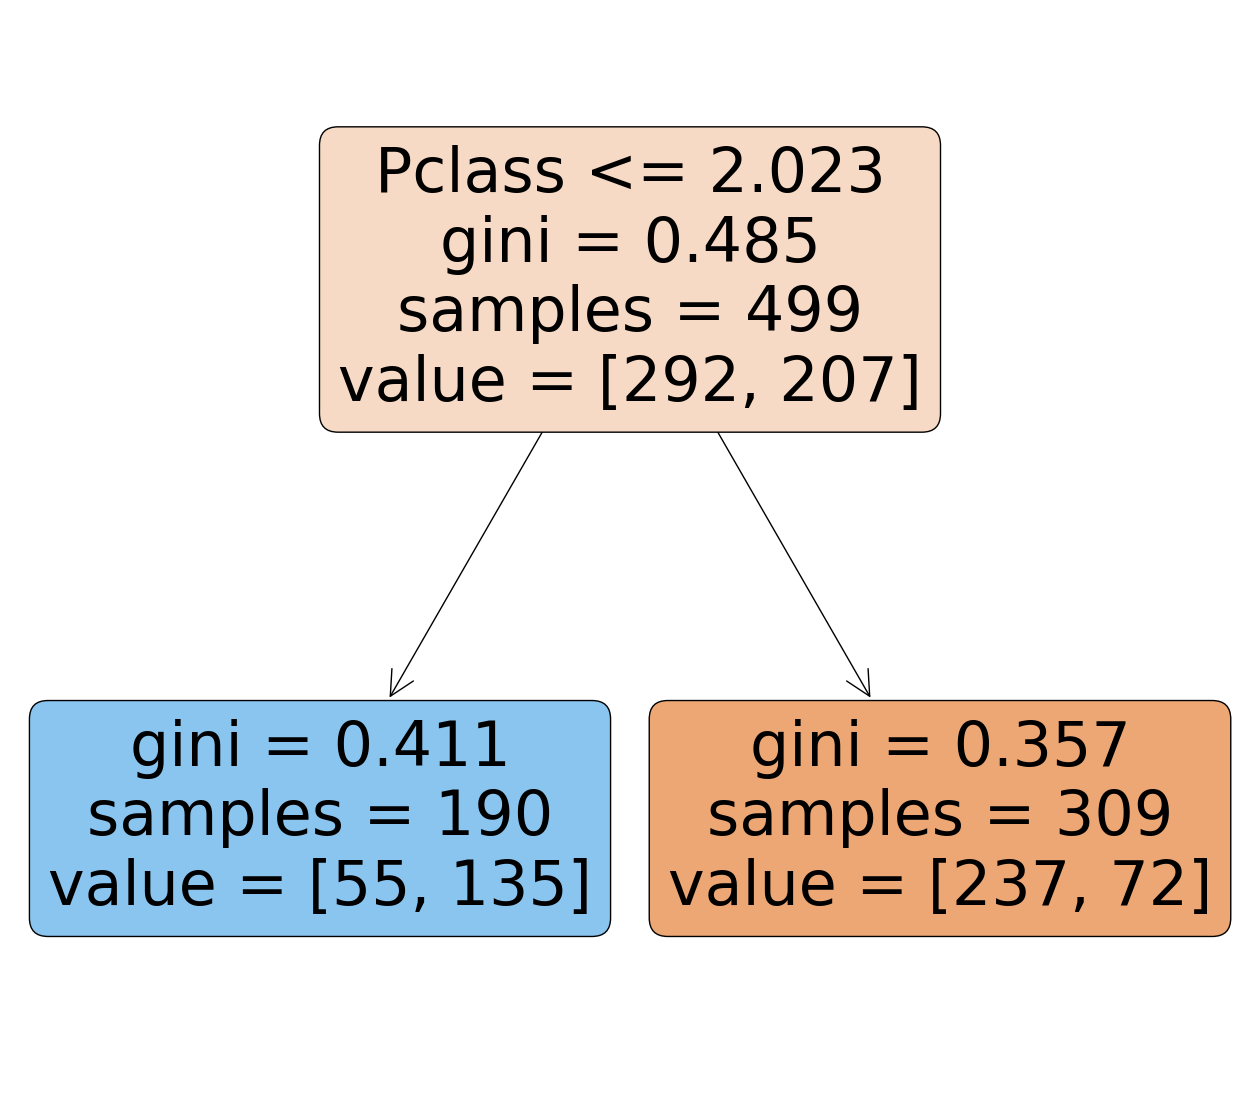

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


 Depth of decision tree => 1

 MSE on train data => 0.1623
 MAE on train data => 0.1623
 Accuracy on train data => 1.0000

 MSE on validation data => 0.2991
 MAE on validation data => 0.2991
 Accuracy on validation data => 0.7009

 MSE on test data => 0.3333
 MAE on test data => 0.3333
 Accuracy on test data => 0.6667



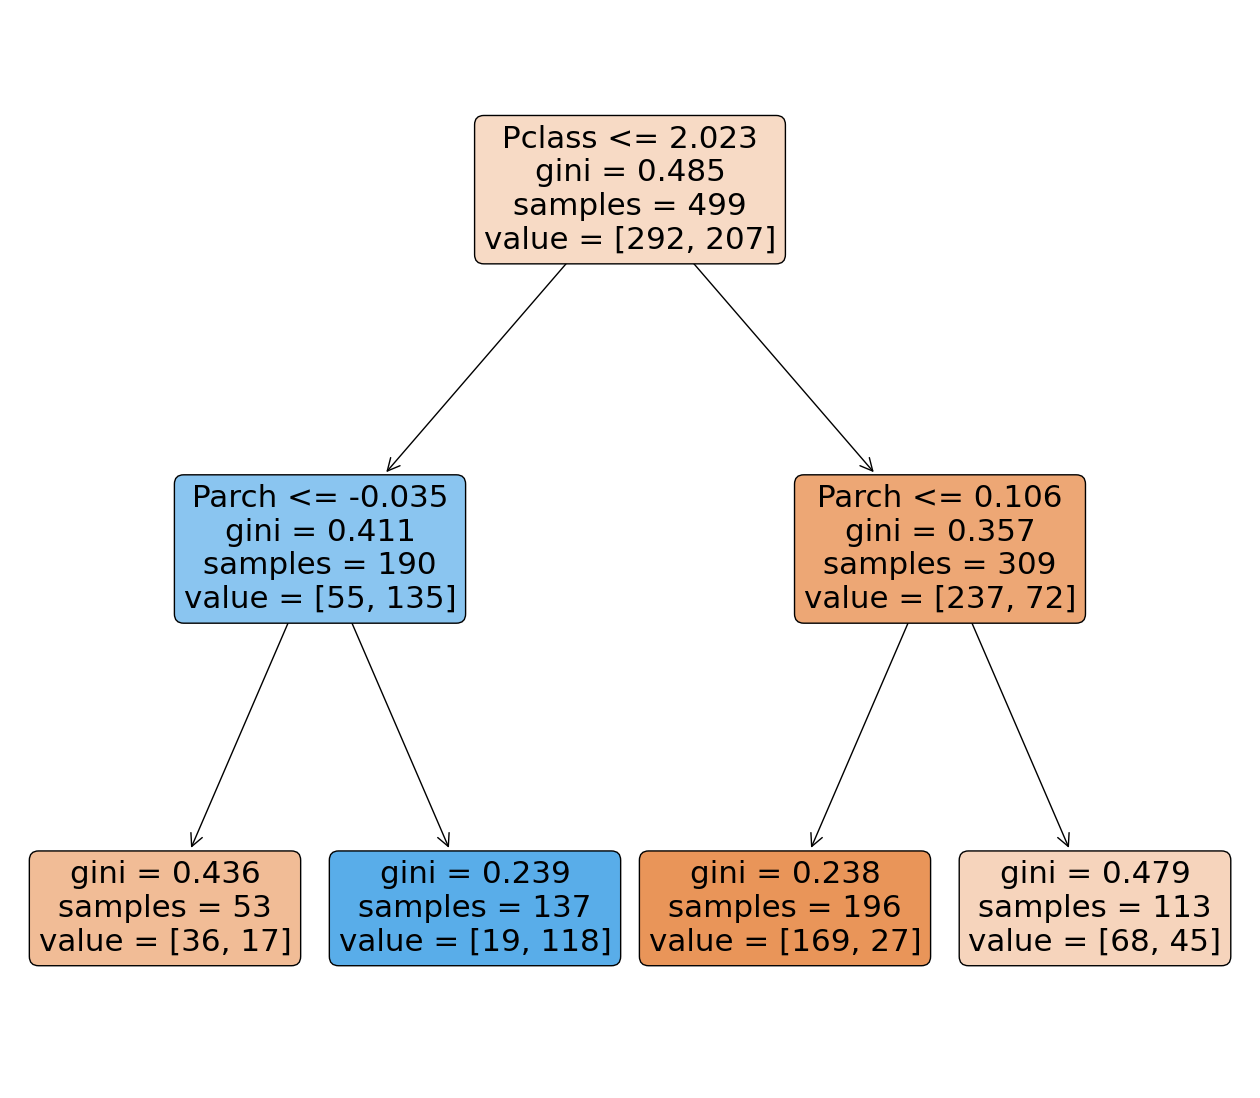

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


 Depth of decision tree => 2

 MSE on train data => 0.1623
 MAE on train data => 0.1623
 Accuracy on train data => 1.0000

 MSE on validation data => 0.2991
 MAE on validation data => 0.2991
 Accuracy on validation data => 0.7009

 MSE on test data => 0.3333
 MAE on test data => 0.3333
 Accuracy on test data => 0.6667



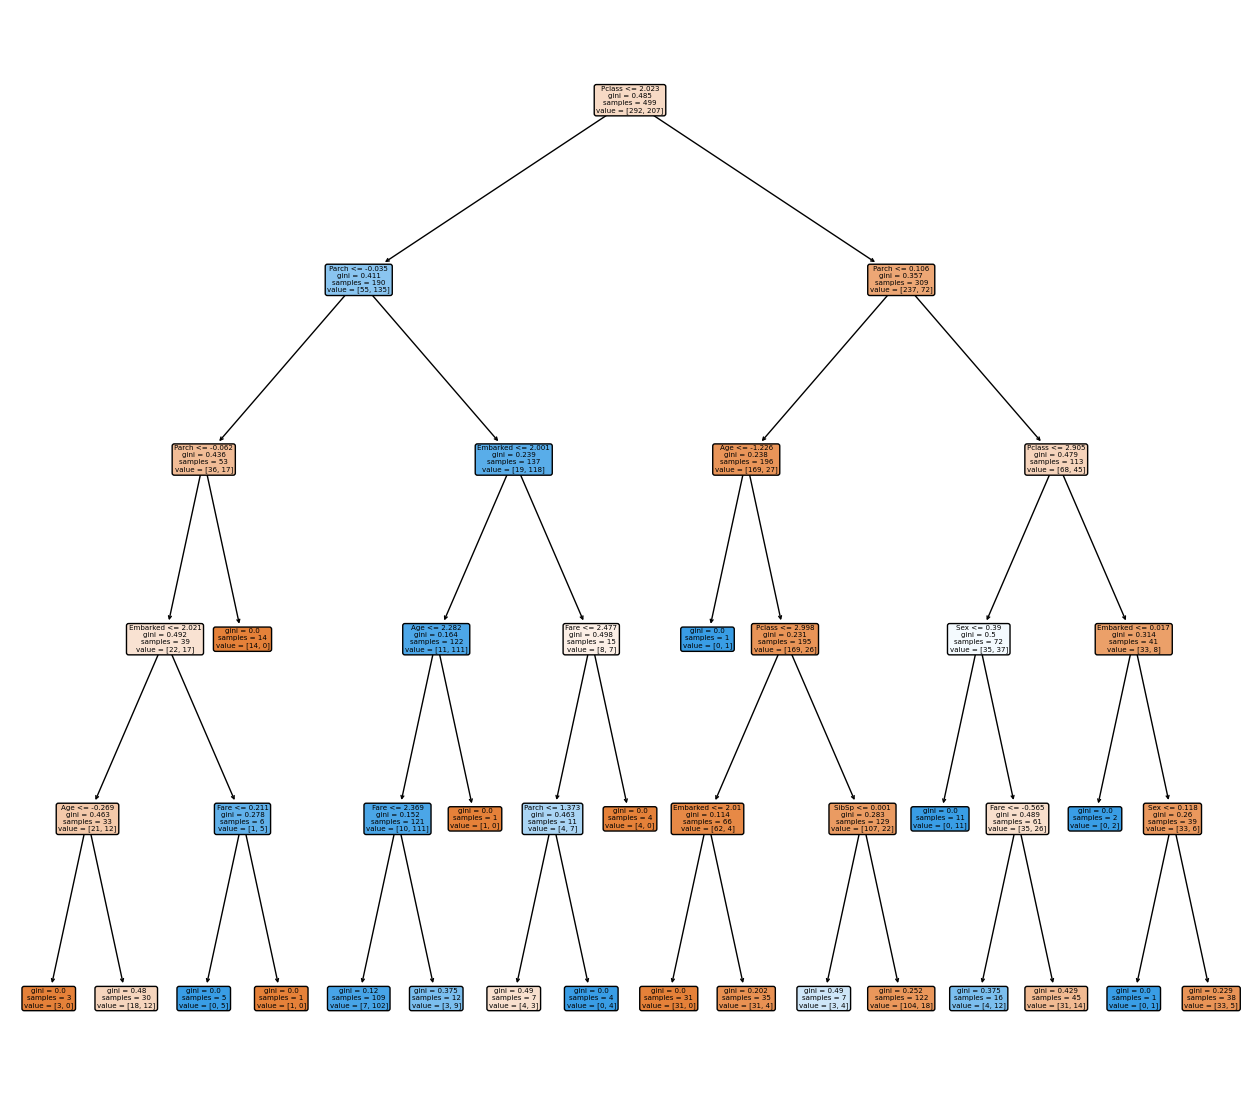

 Depth of decision tree => 5

 MSE on train data => 0.1623
 MAE on train data => 0.1623
 Accuracy on train data => 1.0000

 MSE on validation data => 0.5701
 MAE on validation data => 0.5701
 Accuracy on validation data => 0.4299

 MSE on test data => 0.5741
 MAE on test data => 0.5741
 Accuracy on test data => 0.4259



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
denoise_trees = []
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=32)
    model.fit(X_train_denoised, y_train)
    denoise_trees.append(model)

for tree in denoise_trees:
    plt.figure(figsize=(16, 14))
    plot_tree(tree, feature_names=list(X.columns), filled=True, rounded=True)
    plt.show()
    y_pred_train_denoised = tree.predict(X_train_denoised)
    y_pred_val = tree.predict(X_val)
    y_pred_test = tree.predict(X_test)

    threshold = 0.1

    y_pred_train_bin = (y_pred_train_denoised <= threshold).astype(int)
    y_pred_val_bin = (y_pred_val <= threshold).astype(int)
    y_pred_test_bin = (y_pred_test <= threshold).astype(int)

    y_train_bin = (y_train <= threshold).astype(int)
    y_val_bin = (y_val <= threshold).astype(int)
    y_test_bin = (y_test <= threshold).astype(int)


    print(f" Depth of decision tree => {tree.max_depth}\n\n",

        f"MSE on train data => {mean_squared_error(y_train, y_pred_train):.4f}\n",
        f"MAE on train data => {mean_absolute_error(y_train, y_pred_train):.4f}\n",
        f"Accuracy on train data => {accuracy_score(y_train_bin, y_train_bin):.4f}\n\n"

        f" MSE on validation data => {mean_squared_error(y_val, y_pred_val):.4f}\n",
        f"MAE on validation data => {mean_absolute_error(y_val, y_pred_val):.4f}\n",
        f"Accuracy on validation data => {accuracy_score(y_val_bin, y_pred_val_bin):.4f}\n\n",

        f"MSE on test data => {mean_squared_error(y_test, y_pred_test):.4f}\n",
        f"MAE on test data => {mean_absolute_error(y_test, y_pred_test):.4f}\n",
        f"Accuracy on test data => {accuracy_score(y_test_bin, y_pred_test_bin):.4f}\n")